# Distribuições

A estatística descritiva é limitada para resumir dados, visto que dados com características completamente distintas podem ter os mesmos valores para média, mediana e variância, por exemplo. 

Uma forma aprofundada de reconhecer as características dos dados é inspecionar a sua _distribuição_. Neste capítulo, discutiremos algumas distribuições e outras técnicas de exploração de dados.

In [282]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Função massa de probabilidade 

A _função massa de probabilidade_ (FMP) associa uma probabilidade à ocorrência de um certo valor dentro de um _espaço de resultados_. Podemos entender a FMP como um histograma normalizado. Isto é, todas as frequências são divididas pelo número de amostras. 

Para estudar a FMP e os demais conceitos neste capítulo, usaremos um banco de dados que contém dados sobre adultos americanos, tais como idade, nível de escolaridade, ocupação, estado civil, entre outros. 

Primeiramente, carregamos o _dataset_. 

In [170]:
adults = pd.read_csv('../database/adults.csv',skiprows=1)
adults.head()

,age,type-employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Comparemos a distribuição da variável _idade_ por histograma e pela PMF.

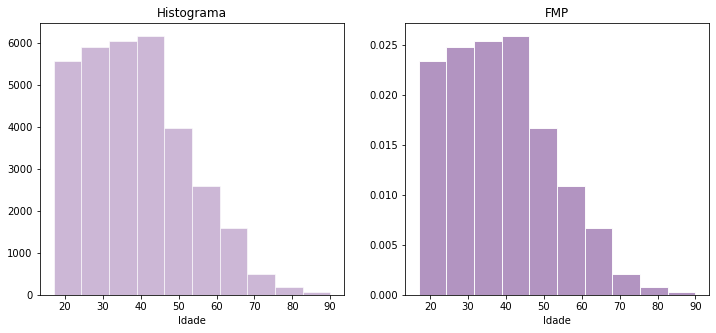

In [171]:
plt.figure(figsize=(12,5))

# histograma
plt.subplot(121)
idade = adults['age']
idade.hist(alpha=.6,bins=10,
           color='#aa88bb',edgecolor='w',
           grid=False);
plt.xlabel('Idade')
plt.title('Histograma')

# FMP
plt.subplot(122)
idade = adults['age']
idade.hist(alpha=.9,bins=10,density=True,
           color='#aa88bb',edgecolor='w',
           grid=False);

plt.xlabel('Idade')
plt.title('FMP');

## Função distribuição cumulativa 

A _função distribuição cumulativa_ (CDF) calcula a probabilidade de uma variável com uma dada distribuição de probabilidade ter um valor menor ou igual a $x$. Em outras palavras, para calcularmos $CDF(x)$ para um valor particular $x$, devemos computar a fração dos valores na amostra que são menores ou iguais a $x$. A CDF é similar ao conceito de _percentil_, mas a resposta é um valor no intervalo [0,1], em vez de um _ranque_ na faixa 0-100.

Considerando um _array_ de amostras `t` e o dado valor $x$, que não necessariamente está em `t`, podemos implementar uma função `CDF` da seguinte forma:

In [172]:
# implementação da CDF
def CDF(t,x):
    c = 0 # contagem
    for ti in t: # cada valor na amostra
        if ti <= x:
            c += 1
    prob = c / len(t) # probabilidade
    return prob

Vejamos um exemplo simples.

In [173]:
# amostra
t = [1,2,3,3,5,7]

CDF(t,2), CDF(t,3), CDF(t,5)

(0.3333333333333333, 0.6666666666666666, 0.8333333333333334)

Comentários:

- A probabilidade de se encontrar um valor menor ou igual a 2 em `t` é de 33,3%.

- A probabilidade de se encontrar um valor menor ou igual a 3 em `t` é de 66,6%.

- A probabilidade de se encontrar um valor menor ou igual a 5 em `t` é de 83,3%.

Para valores fora da amostra:

In [174]:
CDF(t,3.45), CDF(t,1.11)

(0.6666666666666666, 0.16666666666666666)

Se $x$ for menor do que o menor valor de `t`, `CDF(x) = 0`; se $x$ for maior do que o maior valor de `t`, `CDF(x) = 1`.

In [175]:
CDF(t,-4), CDF(t,0.8), CDF(t,7.5), CDF(t,12)

(0.0, 0.0, 1.0, 1.0)

A CDF é uma função _step_:

In [176]:
sex = adults['sex']
im = idade[sex == ' Male']
fm = idade[sex == ' Female']

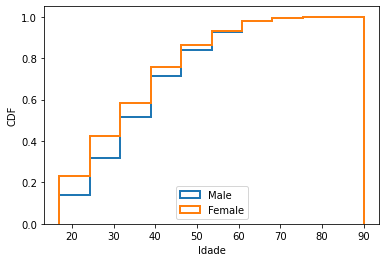

In [177]:
im.hist(density=True,cumulative=True,
        histtype='step',grid=False,linewidth=2,
        label='Male')
fm.hist(density=True,cumulative=True,
        histtype='step',grid=False,linewidth=2,
        label='Female')

plt.xlabel('Idade')
plt.ylabel('CDF')
plt.legend(loc=8);

## Medição de assimetria

A assimetria das distribuições pode ser medida pelo _coeficiente de Pearson_, dado por:

$$p = 3(\mu - \theta)\sigma,$$

onde $\mu$ é a média, $\theta$ é a mediana e $\sigma$ é o desvio padrão.

Podemos defini-lo como:

In [264]:
# coeficiente de pearson
def p(x):
    return 3*( x.mean() - x.median() )*x.std()

A seguir calculamos o coeficiente de Pearson para a série de idades para homens e mulheres.

In [266]:
p(im), p(fm)

(57.50230041174153, 78.12203531109172)

Comparemos com os histogramas.

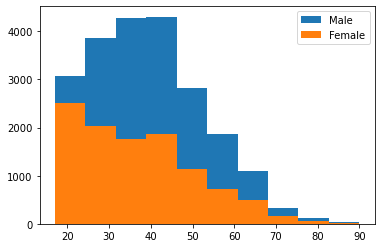

In [273]:
im.hist(grid=False,label='Male')
fm.hist(grid=False,label='Female')
plt.legend();

A interpretação da assimetria é a seguinte:

- Na assimetria à direita (ou positiva), a moda e a mediana localizam-se à esquerda da média. Isto significa que o histograma é mais denso à esquerda. 

- Na assimetria à esquerda (ou negativa), a moda e a mediana localizam-se à direita da média. Isto significa que o histograma é mais denso à direita.

- Coeficientes de assimetria positivos explicam assimetria à direita.

- Coeficientes de assimetria negativos explicam assimetria à esquerda.

- Coeficientes de assimetria nulos explicam simetria (distribuição normal).

Comentários:

- No exemplo anterior, o coeficiente de Pearson maior para a distribuição de idades entre mulheres mostra que ela é mais assimétrica do que a distribuição de idades para mulheres.

## Distribuições contínuas

Distribuições baseadas em observações de amostras finitas são chamadas de _distribuições empíricas_, a exemplo da FMP anterior. Em muitas situações, necessitamos de _distribuições contínuas_. No caso de funções contínuas, a FMP é generalizada para a _função densidade de probabilidade_ (PDF). A PDF é definida por meio de integração.

### Distribuição exponencial

A _distribuição exponencial_ (DE) serve para medir tempos entre eventos, que são chamados de  "tempos de chegadas" (_inter-arrival times_). Se os eventos têm a mesma probabilidade de ocorrer a qualquer momento, a distribuição dos tempos de chegadas tende a se parecer com uma distribuição exponencial.

DEs são úteis para descrever: o tempo de realização de uma prova, o tempo de vida de aparelhos, o tempo de espera em restaurantes, o tempo para realizar uma prova.

A CDF e a PDF de uma distribuição exponencial são definidas por:

$$CDF(x) = 1 - e^{-\lambda x}, \ \ \ PDF(x) = \lambda e^{-\lambda x},$$

onde $\lambda$ é um parâmetro que define o formato da distribuição.

Uma DE tem: 

- média = $1/\lambda$
- variância = $1/\lambda^2$
- mediana = $\ln(2)/\lambda.$

Para plotar uma DE aleatoriamente, podemos utilizar o _numpy_ ou o _scipy_.

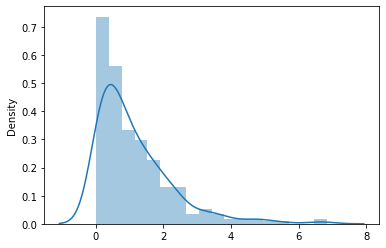

In [284]:
lamb = 1.3
n = 300
de = np.random.exponential(scale=lamb,size=n)
distplot(de);

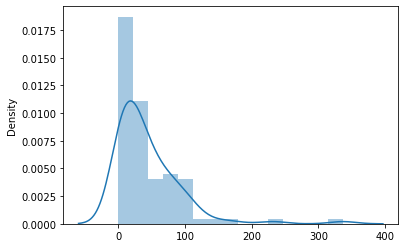

In [286]:
lamb = 50.3
n = 100
de = np.random.exponential(scale=lamb,size=n)
distplot(de);

### Distribuição normal

In [290]:
1335-1290

45